In [1]:
import matplotlib.pyplot as plt
from urllib.request import urlopen
from sklearn.model_selection import train_test_split
import pickle, os
import numpy as np
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
import random

In [2]:
# url to data
url_main = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/';

######### LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "Ising2DFM_reSample_L40_T=All.pkl" 
# The labels are obtained from the following file:
label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"


#DATA
data = pickle.load(urlopen(url_main + data_file_name)) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

#LABELS (convention is 1 for ordered states and 0 for disordered states)
labels = pickle.load(urlopen(url_main + label_file_name)) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

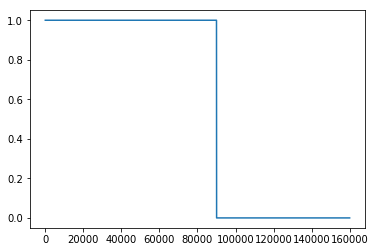

In [3]:
plt.plot(labels)

In [4]:
print(data[0])
print(data[-1])

[-1 -1 -1 ... -1 -1 -1]
[ 1  1  1 ...  1 -1 -1]


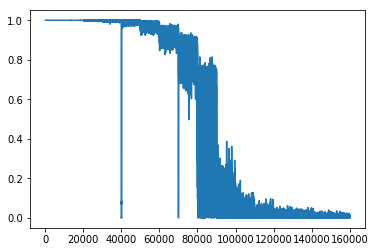

In [5]:
mag = [np.average(d)**2 for d in data]
plt.plot(mag)

In [6]:
# Predict a phase via magnetization
acc = 0
for i, d in enumerate(data):
  m2 = np.average(d)**2
  pred = 0
  if m2 > 0.4:
    pred = 1
  if pred == labels[i]:
    acc += 1
  
acc /= len(data)
print(acc)

0.9839875


In [11]:
# ロジスティック回帰
logreg=linear_model.LogisticRegression(C=1.0,random_state=1,verbose=0,max_iter=1E3,tol=1E-5,solver='liblinear')
logreg.fit(data, labels)

# 正答率のチェック
acc = logreg.score(data,labels)
print('accuracy: %0.4f '% acc)

accuracy: 0.6604 


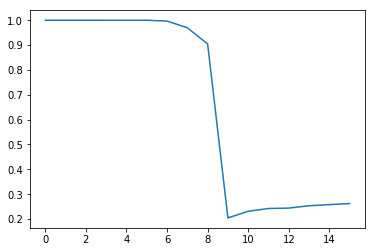

In [8]:
ds = np.split(data, 16)
ls = np.split(labels, 16)
acc = []
for i in range(16):
    acc.append(logreg.score(ds[i],ls[i]))
plt.plot(acc)

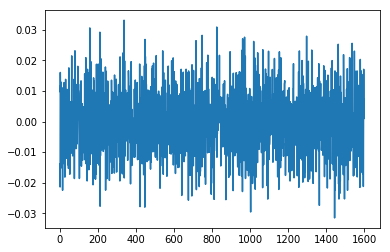

In [9]:
plt.plot(logreg.coef_[0])

In [10]:
logreg.intercept_[0]

0.2738668768118068

In [12]:
np.average(logreg.coef_[0])

9.447853262779457e-07